In [117]:
#reading the data
import pandas as pd
data= pd.read_csv("data/covid_april_2020_combined.csv")
data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,NaN,1.0,...,NaN,437.0,NaN,84000001.0,USA,NaN,12.264945,2020-04-12,62029.0,2.536133
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,198.0,2.0,...,NaN,31.0,NaN,84000002.0,USA,1344.711576,11.397059,2020-04-12,8038.0,2.941176
2,American Samoa,US,NaN,-14.2710,-170.1322,0,0,NaN,NaN,60.0,...,NaN,NaN,NaN,16.0,ASM,5.391708,NaN,2020-04-12,3.0,NaN
3,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,NaN,4.0,...,NaN,NaN,NaN,84000004.0,USA,578.522286,NaN,2020-04-12,52289.0,3.246753
4,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,886.0,5.0,...,NaN,130.0,NaN,84000005.0,USA,761.753354,10.156250,2020-04-12,19722.0,2.109375


In [118]:
df=data

In [119]:
df.shape

(1120, 21)

In [120]:
#df.dropna(inplace=True)

# Data aggregation
df_grouped = df.groupby(['Province_State']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'FIPS': 'mean',
}).reset_index()

# Display the preprocessed dataframe
print(df_grouped.head(100))


              Province_State  Confirmed  Deaths          FIPS
0                    Alabama     103279    3394      1.000000
1                     Alaska       6115     169      2.000000
2             American Samoa          0       0     60.000000
3                    Arizona     102403    4064      4.000000
4                   Arkansas      42827     814      5.000000
5                 California     681643   25077      6.000000
6                   Colorado     300816   19998      8.000000
7                Connecticut     388673   26933      9.000000
8                   Delaware      58148    2288     10.000000
9           Diamond Princess        931       0  84256.421053
10      District of Columbia      58345    2378     11.000000
11                   Florida     522619   16532     12.000000
12                   Georgia     377012   14860     13.000000
13            Grand Princess       1957      24  94788.473684
14                      Guam       2615      95     66.000000
15      

In [121]:
df_grouped.head()

,Province_State,Confirmed,Deaths,FIPS
0,Alabama,103279,3394,1.0
1,Alaska,6115,169,2.0
2,American Samoa,0,0,60.0
3,Arizona,102403,4064,4.0
4,Arkansas,42827,814,5.0


In [122]:
df_grouped.dtypes

Province_State     object
Confirmed           int64
Deaths              int64
FIPS              float64
dtype: object

In [123]:
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal as lps
import numpy as np
from esda.moran import Moran

states = gpd.read_file("tl_2020_us_state/tl_2020_us_state.shp")
states["FIPS"]=states["STATEFP"]
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266296765,489206049,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",54
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138958484319,45975808217,+28.3989775,-082.5143005,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",12
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778461053,6216594318,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",17
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232157570,18949864226,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",27
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151895765,6979171386,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",24


In [124]:
len(df_grouped)

59

In [125]:
len(states)

56

In [126]:
df_grouped.isnull().sum()

Province_State    0
Confirmed         0
Deaths            0
FIPS              1
dtype: int64

In [127]:
states['FIPS'] = states['FIPS'].astype(float)

# Join the COVID-19 data with the spatial data
merged_data = states.merge(df_grouped, left_on='FIPS', right_on='FIPS', how='inner')
merged_data.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,Province_State,Confirmed,Deaths
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266296765,489206049,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",54.0,West Virginia,16922,452
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138958484319,45975808217,+28.3989775,-082.5143005,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",12.0,Florida,522619,16532
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778461053,6216594318,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",17.0,Illinois,662762,28439
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232157570,18949864226,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",27.0,Minnesota,53896,3427
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151895765,6979171386,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",24.0,Maryland,277737,12088


In [128]:
len(merged_data)

56

In [129]:
len(df_grouped)

59

In [130]:
#find the states which got omitted
df_grouped[df_grouped['Province_State'].isin(merged_data['Province_State'])==False]

,Province_State,Confirmed,Deaths,FIPS
9,Diamond Princess,931,0,84256.421053
13,Grand Princess,1957,24,94788.473684
45,Recovered,0,0,NaN


In [15]:
merged_data.columns

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
       'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'FIPS', 'Province_State', 'Confirmed', 'Deaths'],
      dtype='object')

In [16]:
req_col=['geometry', 'FIPS', 'Province_State', 'Confirmed', 'Deaths']
merged_data2=merged_data[req_col]
merged_data2.head()

,geometry,FIPS,Province_State,Confirmed,Deaths
0,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",54.0,West Virginia,16922,452
1,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",12.0,Florida,522619,16532
2,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",17.0,Illinois,662762,28439
3,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",27.0,Minnesota,53896,3427
4,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",24.0,Maryland,277737,12088


In [17]:
merged_data2.shape

(56, 5)

In [18]:
beds = pd.read_csv("data/Hospital_Beds_per1000.csv")

In [19]:
beds.head()

,Location,Total
0,Alabama,3.07
1,Alaska,2.23
2,Arizona,1.99
3,Arkansas,3.13
4,California,1.89


In [20]:
len(beds)

51

In [21]:
merged_data2[merged_data2['Province_State'].isin(beds["Location"])==False]

,geometry,FIPS,Province_State,Confirmed,Deaths
34,"MULTIPOLYGON (((-64.84373 18.39371, -64.84135 ...",78.0,Virgin Islands,1029,51
35,"MULTIPOLYGON (((145.57260 15.12502, 145.58774 ...",69.0,Northern Mariana Islands,254,38
36,"POLYGON ((144.56343 13.44806, 144.56357 13.450...",66.0,Guam,2615,95
41,"MULTIPOLYGON (((-170.79716 -14.24664, -170.794...",60.0,American Samoa,0,0
49,"MULTIPOLYGON (((-67.20794 18.44228, -67.20844 ...",72.0,Puerto Rico,23072,1272


In [22]:
beds.isnull().sum()

Location    0
Total       0
dtype: int64

In [23]:
merged_data3 = merged_data2.merge(beds, left_on='Province_State', right_on='Location', how='inner')

In [24]:
len(merged_data3)

51

In [25]:
merged_data2[merged_data2["Province_State"].isin(merged_data3['Province_State'])==False]

,geometry,FIPS,Province_State,Confirmed,Deaths
34,"MULTIPOLYGON (((-64.84373 18.39371, -64.84135 ...",78.0,Virgin Islands,1029,51
35,"MULTIPOLYGON (((145.57260 15.12502, 145.58774 ...",69.0,Northern Mariana Islands,254,38
36,"POLYGON ((144.56343 13.44806, 144.56357 13.450...",66.0,Guam,2615,95
41,"MULTIPOLYGON (((-170.79716 -14.24664, -170.794...",60.0,American Samoa,0,0
49,"MULTIPOLYGON (((-67.20794 18.44228, -67.20844 ...",72.0,Puerto Rico,23072,1272


In [26]:
merged_data3.head()

,geometry,FIPS,Province_State,Confirmed,Deaths,Location,Total
0,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",54.0,West Virginia,16922,452,West Virginia,3.62
1,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",12.0,Florida,522619,16532,Florida,2.48
2,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",17.0,Illinois,662762,28439,Illinois,2.44
3,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",27.0,Minnesota,53896,3427,Minnesota,2.39
4,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",24.0,Maryland,277737,12088,Maryland,1.81


In [27]:
above65=pd.read_csv("data/people_above_65.csv")

In [28]:
above65.head()

,Location,65+
0,United States,0.165
1,Alabama,0.175
2,Alaska,0.130
3,Arizona,0.182
4,Arkansas,0.173


In [29]:
len(above65)

53

In [30]:
merged_data4 = merged_data3.merge(above65, left_on='Province_State', right_on='Location', how='inner')

In [31]:
merged_data4.head()

,geometry,FIPS,Province_State,Confirmed,Deaths,Location_x,Total,Location_y,65+
0,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",54.0,West Virginia,16922,452,West Virginia,3.62,West Virginia,0.205
1,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",12.0,Florida,522619,16532,Florida,2.48,Florida,0.211
2,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",17.0,Illinois,662762,28439,Illinois,2.44,Illinois,0.160
3,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",27.0,Minnesota,53896,3427,Minnesota,2.39,Minnesota,0.162
4,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",24.0,Maryland,277737,12088,Maryland,1.81,Maryland,0.160


In [32]:
len(merged_data4)

51

In [33]:
merged_data4.isnull().sum()

geometry          0
FIPS              0
Province_State    0
Confirmed         0
Deaths            0
Location_x        0
Total             0
Location_y        0
65+               0
dtype: int64

In [34]:
type(merged_data4)

geopandas.geodataframe.GeoDataFrame

In [35]:
merged_data4.geometry

0     POLYGON ((-81.74725 39.09538, -81.74635 39.096...
1     MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...
2     POLYGON ((-91.18529 40.63780, -91.17510 40.643...
3     POLYGON ((-96.78438 46.63050, -96.78434 46.630...
4     POLYGON ((-77.45881 39.22027, -77.45866 39.220...
5     MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ...
6     POLYGON ((-116.89971 44.84061, -116.89967 44.8...
7     POLYGON ((-72.32990 43.60021, -72.32984 43.600...
8     POLYGON ((-82.41674 36.07283, -82.41660 36.073...
9     POLYGON ((-73.31328 44.26413, -73.31274 44.265...
10    POLYGON ((-73.51808 41.66672, -73.51807 41.666...
11    POLYGON ((-75.76007 39.29682, -75.76010 39.297...
12    POLYGON ((-106.00632 36.99527, -106.00531 36.9...
13    MULTIPOLYGON (((-124.13656 41.46445, -124.1378...
14    POLYGON ((-75.18960 40.59178, -75.18977 40.592...
15    POLYGON ((-92.88707 45.64415, -92.88671 45.644...
16    POLYGON ((-124.06545 45.78305, -124.06206 45.7...
17    POLYGON ((-104.05264 42.00178, -104.05263 

In [36]:
merged_data4.columns

Index(['geometry', 'FIPS', 'Province_State', 'Confirmed', 'Deaths',
       'Location_x', 'Total', 'Location_y', '65+'],
      dtype='object')

In [37]:
merged_data4 = merged_data4.rename(columns={"Total": "Hospital_beds_per1000"})

In [38]:
merged_data4.columns

Index(['geometry', 'FIPS', 'Province_State', 'Confirmed', 'Deaths',
       'Location_x', 'Hospital_beds_per1000', 'Location_y', '65+'],
      dtype='object')

In [39]:
req_col=['geometry', 'FIPS', 'Province_State', 'Confirmed', 'Deaths','Hospital_beds_per1000','65+']
merged_data5=merged_data4[req_col]
merged_data5.head()

,geometry,FIPS,Province_State,Confirmed,Deaths,Hospital_beds_per1000,65+
0,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",54.0,West Virginia,16922,452,3.62,0.205
1,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",12.0,Florida,522619,16532,2.48,0.211
2,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",17.0,Illinois,662762,28439,2.44,0.160
3,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",27.0,Minnesota,53896,3427,2.39,0.162
4,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",24.0,Maryland,277737,12088,1.81,0.160


In [40]:
gdf=merged_data5

In [41]:
statewide_death_rate = gdf['Deaths'].sum() / gdf['Confirmed'].sum()
statewide_death_rate

0.05491718277355068

In [42]:
gdf['expected_deaths'] = gdf['Confirmed'] * statewide_death_rate

# Compute SDR for each state
gdf['SDR'] = gdf['Deaths'] / gdf['expected_deaths']
gdf.head()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geometry,FIPS,Province_State,Confirmed,Deaths,Hospital_beds_per1000,65+,expected_deaths,SDR
0,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",54.0,West Virginia,16922,452,3.62,0.205,929.308567,0.486383
1,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",12.0,Florida,522619,16532,2.48,0.211,28700.763144,0.576013
2,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",17.0,Illinois,662762,28439,2.44,0.160,36397.021889,0.781355
3,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",27.0,Minnesota,53896,3427,2.39,0.162,2959.816483,1.157842
4,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",24.0,Maryland,277737,12088,1.81,0.160,15252.533592,0.792524


In [43]:
#investigate the NAs
gdf.isnull().sum()

geometry                 0
FIPS                     0
Province_State           0
Confirmed                0
Deaths                   0
Hospital_beds_per1000    0
65+                      0
expected_deaths          0
SDR                      0
dtype: int64

In [44]:
len(gdf)

51

In [45]:
# Convert DataFrame to PySAL's spatial weights object
w = lps.weights.Queen.from_dataframe(gdf)

C:\Users\User\AppData\Local\Temp\ipykernel_4848\2226492236.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(gdf)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 31, 37.
  W.__init__(self, neighbors, ids=ids, **kw)


In [46]:
# Standardize the weights
w.transform = 'R'

('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')


In [47]:
# Construct a spatial lag variable
lag_confirmed = lps.weights.lag_spatial(w, gdf['SDR'])

In [48]:
# Conduct Moran's I test for spatial autocorrelation of SDRs
moran_cases = Moran(gdf['SDR'], w)
print("Moran's I for SDR:", moran_cases.I)
print("Moran's I p-value:", moran_cases.p_sim)

Moran's I for SDR: 0.28029218285750596
Moran's I p-value: 0.001


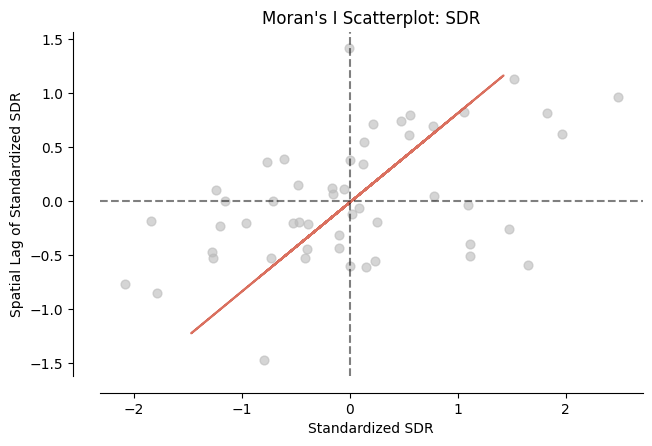

In [49]:
# Generate Moran scatterplot
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran_cases)

# Customize the labels of the axes
ax.set_xlabel('Standardized SDR')
ax.set_ylabel('Spatial Lag of Standardized SDR')
ax.set_title("Moran's I Scatterplot: SDR")
plt.show()

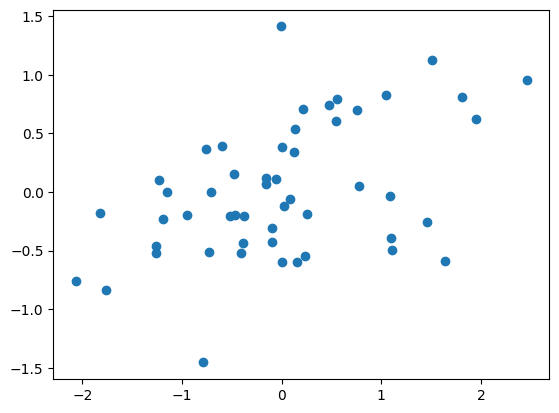

In [50]:
SDR_standardized = (gdf['SDR'] - gdf['SDR'].mean()) / gdf['SDR'].std()
Spatial_Lag_SDR = lps.weights.lag_spatial(w, SDR_standardized)
plt.scatter(SDR_standardized,Spatial_Lag_SDR)

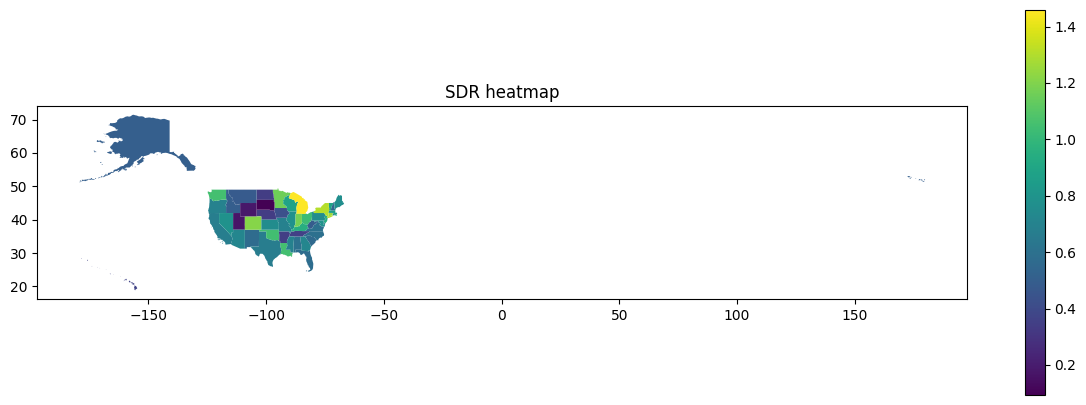

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title("SDR heatmap")
gdf.plot(ax=ax, column='SDR', legend=True)
plt.show()

In [52]:
import numpy as np

# Function to compute differences in SDR for adjacent states
def compute_boundary_differences(gdf):
    boundaries = []
    for index, state in gdf.iterrows():
        neighbors = gdf[gdf.geometry.touches(state.geometry)]
        for neighbor_index, neighbor in neighbors.iterrows():
            boundary_diff = np.abs(state['SDR'] - neighbor['SDR'])
            boundaries.append({
                'State1': state['Province_State'],
                'State2': neighbor['Province_State'],
                'boundary_diff': boundary_diff
            })
    return pd.DataFrame(boundaries)

boundary_diffs = compute_boundary_differences(gdf)

# Identify significant boundaries (e.g., upper 20% and 50%)
upper_20 = boundary_diffs['boundary_diff'].quantile(0.80)
upper_50 = boundary_diffs['boundary_diff'].quantile(0.50)

# Mark boundaries
boundary_diffs['significant_20'] = boundary_diffs['boundary_diff'] > upper_20
boundary_diffs['significant_50'] = boundary_diffs['boundary_diff'] > upper_50


In [53]:
boundary_diffs.head()

,State1,State2,boundary_diff,significant_20,significant_50
0,West Virginia,Maryland,0.306141,False,True
1,West Virginia,Pennsylvania,0.270848,False,False
2,West Virginia,Ohio,0.545227,True,True
3,West Virginia,Kentucky,0.464490,True,True
4,West Virginia,Virginia,0.115108,False,False


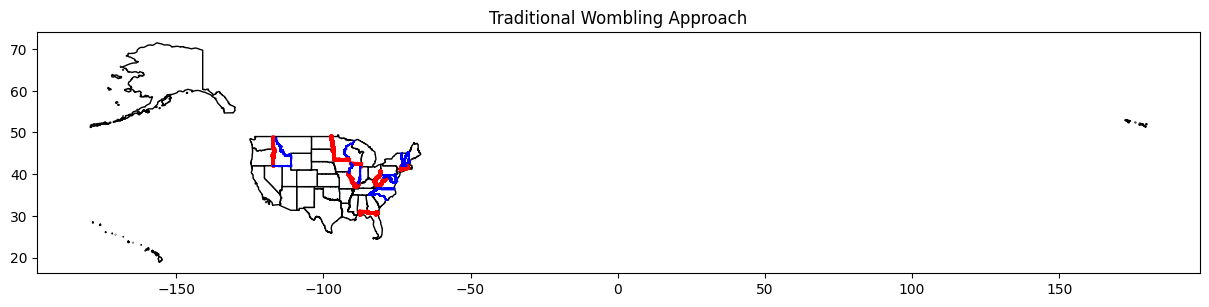

In [54]:
import matplotlib.pyplot as plt

# Plot the states
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title("Traditional Wombling Approach")
gdf.plot(ax=ax, color='white', edgecolor='black')
try:
    # Plot the boundaries
    for index, boundary in boundary_diffs.iterrows():
        state1 = gdf[gdf['Province_State'] == boundary['State1']]
        state2 = gdf[gdf['Province_State'] == boundary['State2']]
        line = state1.geometry.iloc[0].intersection(state2.geometry.iloc[0])
        if boundary['significant_20']:
            line_color = 'red'
            line_width = 2
        elif boundary['significant_50']:
            line_color = 'blue'
            line_width = 1
        for l in line.geoms:
            x, y = l.coords.xy
            ax.plot(x, y, color=line_color, linewidth=line_width)
except:
    pass
plt.show()

In [55]:
boundary_diffs[boundary_diffs['significant_20']==True]

,State1,State2,boundary_diff,significant_20,significant_50
2,West Virginia,Ohio,0.545227,True,True
3,West Virginia,Kentucky,0.464490,True,True
9,Illinois,Michigan,0.677156,True,True
14,Minnesota,North Dakota,0.822525,True,True
16,Minnesota,South Dakota,1.064247,True,True
17,Minnesota,Iowa,0.728851,True,True
23,Rhode Island,Connecticut,0.547401,True,True
24,Rhode Island,New York,0.590706,True,True
27,Idaho,Washington,0.550209,True,True
42,Connecticut,Rhode Island,0.547401,True,True


In [56]:
len(boundary_diffs[boundary_diffs['significant_20']==True])

44

In [57]:
boundary_diffs[boundary_diffs['significant_20']==True][boundary_diffs[boundary_diffs['significant_20']==True]['State1']<boundary_diffs[boundary_diffs['significant_20']==True]['State2']]

,State1,State2,boundary_diff,significant_20,significant_50
9,Illinois,Michigan,0.677156,True,True
14,Minnesota,North Dakota,0.822525,True,True
16,Minnesota,South Dakota,1.064247,True,True
27,Idaho,Washington,0.550209,True,True
42,Connecticut,Rhode Island,0.547401,True,True
51,New Mexico,Oklahoma,0.470694,True,True
99,Ohio,West Virginia,0.545227,True,True
108,Colorado,New Mexico,0.637839,True,True
109,Colorado,Nebraska,0.873379,True,True
110,Colorado,Utah,1.044772,True,True


In [58]:
len(boundary_diffs[boundary_diffs['significant_20']==True][boundary_diffs[boundary_diffs['significant_20']==True]['State1']<boundary_diffs[boundary_diffs['significant_20']==True]['State2']])

22

In [59]:
gdf.head()

,geometry,FIPS,Province_State,Confirmed,Deaths,Hospital_beds_per1000,65+,expected_deaths,SDR
0,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",54.0,West Virginia,16922,452,3.62,0.205,929.308567,0.486383
1,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",12.0,Florida,522619,16532,2.48,0.211,28700.763144,0.576013
2,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",17.0,Illinois,662762,28439,2.44,0.160,36397.021889,0.781355
3,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",27.0,Minnesota,53896,3427,2.39,0.162,2959.816483,1.157842
4,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",24.0,Maryland,277737,12088,1.81,0.160,15252.533592,0.792524


In [60]:
w

In [61]:
W_binary = w.full()[0] 

In [62]:
W_binary

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16666667,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
W_binary[W_binary > 0] = 1

In [64]:
W_binary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
#queen without the weights

In [66]:
import numpy as np
import pymc as pm
# Model
with pm.Model() as model:
    # Priors for unknown model parameters
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    # CAR prior for spatial random effects
    phi = pm.ICAR('phi', W=W_binary)  # W is the adjacency matrix
    
    mu = pm.math.exp(pm.math.log(gdf['expected_deaths'])+beta1*gdf['Hospital_beds_per1000']+beta2*gdf['65+'] + phi)
    Y_obs = pm.Poisson('Y_obs', mu=mu, observed=gdf['Deaths'])
    trace = pm.sample(draws=1000, tune=1000,discard_tuned_samples=True, compute_convergence_checks=True)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta1, beta2, phi]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10454 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [67]:
import arviz
arviz.rhat(trace)

<xarray.Dataset> Size: 628B
Dimensions:    (phi_dim_0: 51)
Coordinates:
  * phi_dim_0  (phi_dim_0) int32 204B 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
Data variables:
    beta1      float64 8B 1.049
    beta2      float64 8B 1.048
    phi        (phi_dim_0) float64 408B 1.025 1.048 1.005 ... 1.048 1.007 1.047

array([[<Axes: title={'center': 'phi'}>, <Axes: title={'center': 'phi'}>]],
      dtype=object)

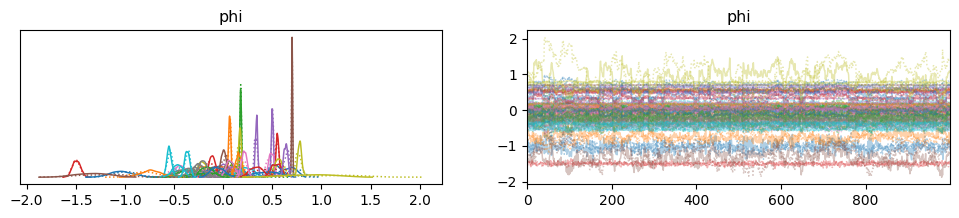

In [68]:
arviz.plot_trace(trace,var_names=("phi"))

array([[<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>]], dtype=object)

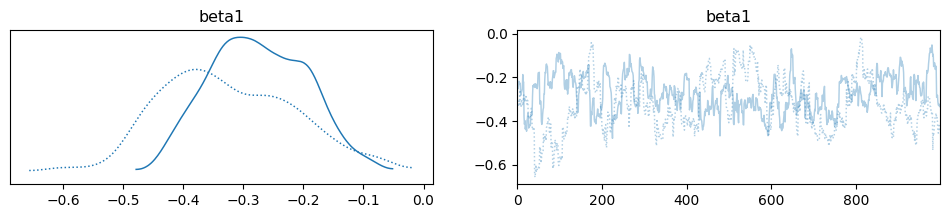

In [69]:
arviz.plot_trace(trace,var_names=("beta1"))

array([[<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>]], dtype=object)

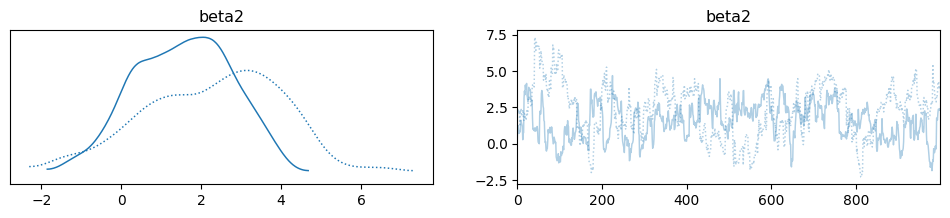

In [70]:
arviz.plot_trace(trace,var_names=("beta2"))

In [71]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [72]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta1,-0.300,0.107,-0.479,-0.090,0.016,0.012,45.0,62.0,1.05
beta2,1.924,1.610,-1.291,4.614,0.244,0.190,45.0,60.0,1.05
phi[0],-0.029,0.072,-0.165,0.104,0.008,0.006,73.0,217.0,1.02
phi[1],-0.213,0.076,-0.345,-0.066,0.011,0.009,45.0,64.0,1.05
phi[2],0.178,0.008,0.164,0.192,0.000,0.000,387.0,875.0,1.01
phi[3],0.551,0.018,0.516,0.586,0.001,0.001,335.0,1129.0,1.01
phi[4],0.003,0.065,-0.119,0.120,0.010,0.007,45.0,59.0,1.05
phi[5],-0.096,0.081,-0.238,0.057,0.012,0.009,47.0,73.0,1.05
phi[6],-0.453,0.071,-0.575,-0.310,0.010,0.007,55.0,79.0,1.04
phi[7],-0.365,0.089,-0.517,-0.196,0.012,0.009,52.0,81.0,1.04


In [73]:
trace.posterior.phi

<xarray.DataArray 'phi' (chain: 2, draw: 1000, phi_dim_0: 51)> Size: 816kB
array([[[-7.16050154e-02, -1.41491517e-01,  1.83554006e-01, ...,
          6.44766091e-01, -3.82496188e-01,  9.10500544e-03],
        [-3.50174321e-02, -1.88319826e-01,  1.71717208e-01, ...,
          7.69558021e-01, -3.51554695e-01, -3.39293999e-02],
        [-8.56179261e-02, -1.82008480e-01,  1.64741063e-01, ...,
          7.87740034e-01, -3.37204053e-01, -6.93223428e-02],
        ...,
        [-3.78767173e-02, -2.50652227e-01,  1.69269703e-01, ...,
          1.04477782e+00, -3.65442721e-01, -1.15042299e-01],
        [ 1.87407808e-02, -2.44565543e-01,  1.81090878e-01, ...,
          1.09694216e+00, -3.68340853e-01, -1.03849519e-01],
        [-3.55618224e-02, -2.32071033e-01,  1.81654651e-01, ...,
          1.06222241e+00, -3.95259930e-01, -1.04319240e-01]],

       [[-4.25567390e-02, -2.34596740e-01,  1.86575844e-01, ...,
          1.04991135e+00, -3.77952587e-01, -1.08756907e-01],
        [-1.04155495e-02, -2.28048955e-01,  1.69126600e-01, ...,
          1.00785765e+00, -3.80901350e-01, -1.06717575e-01],
        [ 1.28672043e-03, -2.41659363e-01,  1.74773834e-01, ...,
          1.02051276e+00, -3.21491855e-01, -1.04264907e-01],
        ...,
        [ 1.40019479e-02, -3.11247875e-01,  1.78792408e-01, ...,
          1.35289724e+00, -3.53745123e-01, -1.76020936e-01],
        [-2.72968788e-02, -2.96636917e-01,  1.80994687e-01, ...,
          1.35575947e+00, -3.48990381e-01, -1.89195281e-01],
        [ 1.94545438e-03, -3.11655889e-01,  1.81836384e-01, ...,
          1.38486603e+00, -3.08126909e-01, -1.56533449e-01]]])
Coordinates:
  * chain      (chain) int32 8B 0 1
  * draw       (draw) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * phi_dim_0  (phi_dim_0) int32 204B 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50

In [74]:
trace.posterior.beta1.shape

(2, 1000)

In [75]:
trace.posterior.beta2.shape

(2, 1000)

In [76]:
beta1_samples=trace.posterior.beta1
beta2_samples=trace.posterior.beta2
phi_samples=trace.posterior.phi

In [77]:
phi_samples.shape

(2, 1000, 51)

In [78]:
len(phi_samples[0])

1000

In [79]:
#gelman rubin statistic

In [80]:
gdf['expected_deaths']

0        929.308567
1      28700.763144
2      36397.021889
3       2959.816483
4      15252.533592
5       5776.848290
6       1797.878730
7       1584.964812
8       7684.616303
9        845.889366
10     21344.826180
11      3193.324344
12      2247.266036
13     37433.913217
14     95590.715520
15      5065.451105
16      2101.405999
17      2123.647458
18     36995.289678
19     12915.807465
20     25704.097232
21     20704.436912
22      5671.791720
23      3529.142917
24     13103.788982
25     16508.214976
26     16519.967253
27      4848.308564
28      2915.498316
29      8372.508934
30       418.633684
31       597.498949
32       724.687144
33      3378.999339
34       930.242159
35    264546.338933
36      4146.137465
37       335.818573
38     34633.960654
39      2351.938187
40      4942.162029
41      6456.558262
42       448.783218
43      2568.037301
44     12918.827910
45      1794.968119
46     44822.745574
47     10444.039986
48      3204.143029
49      3997.751237


In [81]:
phi_samples[1][1]==phi_samples[1][2]

<xarray.DataArray 'phi' (phi_dim_0: 51)> Size: 51B
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])
Coordinates:
    chain      int32 4B 1
  * phi_dim_0  (phi_dim_0) int32 204B 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50

In [82]:
len(beta1_samples[0])

1000

In [83]:
beta1_samples[0]

<xarray.DataArray 'beta1' (draw: 1000)> Size: 8kB
array([-0.19653684, -0.24381462, -0.25136707, -0.23573951, -0.21740998,
       -0.22657839, -0.23147439, -0.22624917, -0.27045374, -0.28045122,
       -0.26718822, -0.2609758 , -0.25142912, -0.18671381, -0.22307277,
       -0.22026702, -0.38062915, -0.41434533, -0.39746592, -0.43625481,
       -0.42196604, -0.42167728, -0.44577236, -0.39631511, -0.38838246,
       -0.36351743, -0.37172632, -0.43137554, -0.41852217, -0.42407404,
       -0.41547088, -0.41849134, -0.37021144, -0.37336055, -0.3633914 ,
       -0.36858806, -0.28736555, -0.2375485 , -0.2416888 , -0.23222926,
       -0.24012605, -0.23029928, -0.24573184, -0.22897501, -0.23059606,
       -0.23309266, -0.23924019, -0.2511931 , -0.23817313, -0.1876403 ,
       -0.17768006, -0.18534176, -0.17622723, -0.30162228, -0.32251199,
       -0.30643659, -0.31599516, -0.40058947, -0.41460153, -0.40518913,
       -0.3679485 , -0.34631935, -0.33874063, -0.27599318, -0.27605023,
       -0.20824447, -0.17619541, -0.17987265, -0.1438346 , -0.13836164,
       -0.14664026, -0.14846772, -0.18517166, -0.23525937, -0.22487576,
       -0.22263537, -0.23627513, -0.24862888, -0.21910708, -0.22125146,
       -0.23392147, -0.25131652, -0.2450636 , -0.20821282, -0.19264327,
       -0.16945153, -0.16923646, -0.20134915, -0.19190005, -0.18381657,
       -0.17635231, -0.17582449, -0.11270638, -0.10541688, -0.09328478,
       -0.097671  , -0.09711011, -0.12937789, -0.08578243, -0.11518734,
...
       -0.24523311, -0.21926021, -0.1923647 , -0.15518942, -0.13657292,
       -0.10742029, -0.10850338, -0.1189292 , -0.14828914, -0.1247209 ,
       -0.13812326, -0.140119  , -0.15341843, -0.1786258 , -0.26278173,
       -0.24966347, -0.2627519 , -0.24534387, -0.27229221, -0.26298454,
       -0.329336  , -0.32865561, -0.30745919, -0.29635137, -0.27407706,
       -0.28751985, -0.2924763 , -0.28930445, -0.26400972, -0.20129943,
       -0.19680101, -0.27688523, -0.26186813, -0.26821603, -0.28936263,
       -0.29659223, -0.30090082, -0.19750354, -0.18613339, -0.19323167,
       -0.23058272, -0.22549762, -0.30575851, -0.21412525, -0.2227243 ,
       -0.21027832, -0.21142204, -0.19120294, -0.23040716, -0.21879331,
       -0.23375776, -0.2451507 , -0.24927334, -0.27682663, -0.28480086,
       -0.28004965, -0.2810709 , -0.262258  , -0.22737611, -0.24852716,
       -0.22078983, -0.24414815, -0.31972323, -0.32214713, -0.30667538,
       -0.30487549, -0.31293618, -0.21249751, -0.16809606, -0.17943331,
       -0.1757086 , -0.16542593, -0.13665148, -0.11610906, -0.09010324,
       -0.08858499, -0.06491612, -0.07013012, -0.08491684, -0.07677546,
       -0.05113377, -0.07476047, -0.10232223, -0.09414809, -0.14999813,
       -0.13724011, -0.13235194, -0.13768608, -0.16314009, -0.14743403,
       -0.15816877, -0.29034609, -0.28697469, -0.28119694, -0.31098684,
       -0.3259095 , -0.32763515, -0.32187002, -0.33357551, -0.32520021])
Coordinates:
    chain    int32 4B 0
  * draw     (draw) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

In [84]:
phi_samples[0][0]

<xarray.DataArray 'phi' (phi_dim_0: 51)> Size: 408B
array([-0.07160502, -0.14149152,  0.18355401,  0.53876419,  0.06110437,
       -0.02539917, -0.40878011, -0.27827271, -0.18787181,  0.14842159,
        0.58673146,  0.08257576, -0.27849898, -0.06961935,  0.34988116,
        0.1874434 , -0.10946679, -0.51372745,  0.19014588,  0.29768304,
        0.61908614,  0.06657194,  0.04832141, -1.47160443,  0.51785978,
       -0.00806293,  0.50772485, -0.20950055,  0.57749564, -0.54859394,
       -1.22586516, -0.70536743, -0.42920545,  0.49003115,  0.12324385,
        0.71110645,  0.11280494, -0.14424207,  0.80470643, -0.49941612,
        0.35126779,  0.13123536, -0.15837147,  0.29784013,  0.63400516,
       -1.46349549,  0.24648863, -0.14748459,  0.64476609, -0.38249619,
        0.00910501])
Coordinates:
    chain      int32 4B 0
    draw       int32 4B 0
  * phi_dim_0  (phi_dim_0) int32 204B 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50

In [85]:
gdf['expected_deaths']

0        929.308567
1      28700.763144
2      36397.021889
3       2959.816483
4      15252.533592
5       5776.848290
6       1797.878730
7       1584.964812
8       7684.616303
9        845.889366
10     21344.826180
11      3193.324344
12      2247.266036
13     37433.913217
14     95590.715520
15      5065.451105
16      2101.405999
17      2123.647458
18     36995.289678
19     12915.807465
20     25704.097232
21     20704.436912
22      5671.791720
23      3529.142917
24     13103.788982
25     16508.214976
26     16519.967253
27      4848.308564
28      2915.498316
29      8372.508934
30       418.633684
31       597.498949
32       724.687144
33      3378.999339
34       930.242159
35    264546.338933
36      4146.137465
37       335.818573
38     34633.960654
39      2351.938187
40      4942.162029
41      6456.558262
42       448.783218
43      2568.037301
44     12918.827910
45      1794.968119
46     44822.745574
47     10444.039986
48      3204.143029
49      3997.751237


In [86]:
gdf['Hospital_beds_per1000']

0     3.62
1     2.48
2     2.44
3     2.39
4     1.81
5     1.94
6     1.85
7     2.05
8     2.07
9     2.03
10    2.06
11    2.30
12    1.74
13    1.89
14    2.36
15    1.95
16    1.66
17    3.40
18    2.68
19    1.60
20    3.19
21    2.26
22    3.07
23    1.70
24    2.68
25    2.20
26    1.92
27    2.23
28    2.78
29    2.68
30    3.25
31    2.05
32    4.26
33    3.10
34    2.53
35    2.53
36    2.04
37    2.23
38    2.45
39    3.13
40    3.93
41    2.89
42    3.20
43    3.17
44    2.64
45    4.61
46    2.29
47    2.01
48    5.01
49    2.72
50    1.99
Name: Hospital_beds_per1000, dtype: float64

In [87]:
beta1_samples[0][0]

<xarray.DataArray 'beta1' ()> Size: 8B
array(-0.19653684)
Coordinates:
    chain    int32 4B 0
    draw     int32 4B 0

In [88]:
beta1_samples[0][0].item()*gdf['Hospital_beds_per1000']

0    -0.711463
1    -0.487411
2    -0.479550
3    -0.469723
4    -0.355732
5    -0.381281
6    -0.363593
7    -0.402901
8    -0.406831
9    -0.398970
10   -0.404866
11   -0.452035
12   -0.341974
13   -0.371455
14   -0.463827
15   -0.383247
16   -0.326251
17   -0.668225
18   -0.526719
19   -0.314459
20   -0.626953
21   -0.444173
22   -0.603368
23   -0.334113
24   -0.526719
25   -0.432381
26   -0.377351
27   -0.438277
28   -0.546372
29   -0.526719
30   -0.638745
31   -0.402901
32   -0.837247
33   -0.609264
34   -0.497238
35   -0.497238
36   -0.400935
37   -0.438277
38   -0.481515
39   -0.615160
40   -0.772390
41   -0.567991
42   -0.628918
43   -0.623022
44   -0.518857
45   -0.906035
46   -0.450069
47   -0.395039
48   -0.984650
49   -0.534580
50   -0.391108
Name: Hospital_beds_per1000, dtype: float64

In [89]:
mu_samples = []
for i in range(len(phi_samples[0])):
    mu_sample_i = np.exp(np.log(gdf['expected_deaths'])+beta1_samples[0][i].item()*gdf['Hospital_beds_per1000']+beta2_samples[0][i].item()*gdf['65+'] + phi_samples[0][i])
    mu_samples.append(mu_sample_i)

In [90]:
len(mu_samples)

1000

In [91]:
len(mu_samples[0])

51

In [92]:
Z_samples = mu_samples / gdf['expected_deaths'].values

In [93]:
Z_samples[0][50]

0.7224792676455871

In [94]:
z_matrix = np.array(Z_samples)

In [95]:
z_matrix.shape

(1000, 51)

In [96]:
len(gdf)

51

In [97]:
# Calculate BLVs for each pair of adjacent states
BLVs = []
for i in range(len(gdf)):
    for j in range(i+1, len(gdf)):
        if W_binary[i, j] == 1:  # if states i and j are adjacent
            D_ij = np.abs(Z_samples[:, i] - Z_samples[:, j])
            BLVs.append((i, j, D_ij))

In [98]:
len(BLVs[2])

3

In [99]:
print(BLVs)

[(0, 4, array([0.29576852, 0.28550545, 0.30836411, 0.29791437, 0.24938388,
       0.24281134, 0.34372074, 0.33211343, 0.31494452, 0.27829539,
       0.32466045, 0.33032706, 0.29241807, 0.29478201, 0.29992906,
       0.3088751 , 0.29748285, 0.32708108, 0.31001244, 0.28733027,
       0.31159104, 0.32629485, 0.3439953 , 0.28129879, 0.27307982,
       0.3501824 , 0.29900588, 0.30834859, 0.29551272, 0.3444545 ,
       0.34107916, 0.30610142, 0.31520827, 0.27418044, 0.28995836,
       0.3337595 , 0.26644383, 0.2644293 , 0.29158105, 0.27296329,
       0.25485384, 0.26944942, 0.32783276, 0.28590623, 0.33165098,
       0.29871916, 0.32022158, 0.33385016, 0.27879457, 0.31669349,
       0.30159446, 0.32213584, 0.3202707 , 0.29225552, 0.28628865,
       0.30691736, 0.2832512 , 0.2923224 , 0.30969958, 0.31817074,
       0.30011321, 0.32669417, 0.34128764, 0.27516419, 0.27368323,
       0.28464522, 0.29557483, 0.30931053, 0.3225115 , 0.3195294 ,
       0.32157341, 0.31554805, 0.30189925, 0.3355894 ,

In [100]:
boundary_diffs2 = []

# Loop through BLVs and append rows to the list
for i, j, D_ij in BLVs:
    state1 = gdf.iloc[i]['Province_State']
    state2 = gdf.iloc[j]['Province_State']
    boundary_diff = np.mean(D_ij)
    
    # Append the new row as a dictionary to the list
    boundary_diffs2.append({
        'State1': state1,
        'State2': state2,
        'boundary_diff': boundary_diff
    })

# Convert the list of dictionaries to a DataFrame
boundary_diffs2 = pd.DataFrame(boundary_diffs2)

print(boundary_diffs2)


            State1                State2  boundary_diff
0    West Virginia              Maryland       0.305586
1    West Virginia          Pennsylvania       0.270499
2    West Virginia                  Ohio       0.545112
3    West Virginia              Kentucky       0.463428
4    West Virginia              Virginia       0.115104
..             ...                   ...            ...
107       Missouri                Kansas       0.066017
108       Missouri                  Iowa       0.257245
109        Montana          South Dakota       0.376362
110   South Dakota                  Iowa       0.332019
111       Virginia  District of Columbia       0.139071

[112 rows x 3 columns]


In [101]:
upper_20 = boundary_diffs2['boundary_diff'].quantile(0.80)
upper_50 = boundary_diffs2['boundary_diff'].quantile(0.50)

boundary_diffs2['significant_20'] = boundary_diffs2['boundary_diff'] > upper_20
boundary_diffs2['significant_50'] = boundary_diffs2['boundary_diff'] > upper_50

In [102]:
boundary_diffs2[boundary_diffs2['significant_20']==True]

,State1,State2,boundary_diff,significant_20,significant_50
2,West Virginia,Ohio,0.545112,True,True
3,West Virginia,Kentucky,0.463428,True,True
9,Illinois,Michigan,0.677412,True,True
14,Minnesota,North Dakota,0.820936,True,True
16,Minnesota,South Dakota,1.058422,True,True
17,Minnesota,Iowa,0.726403,True,True
22,Rhode Island,Connecticut,0.547252,True,True
23,Rhode Island,New York,0.590660,True,True
26,Idaho,Washington,0.549143,True,True
46,New Mexico,Colorado,0.637753,True,True


In [103]:
len(boundary_diffs2[boundary_diffs2['significant_20']==True])

23

In [104]:
sorted = boundary_diffs2[boundary_diffs2['significant_20']==True].sort_values(by='boundary_diff', ascending=False)

In [105]:
sorted.head(100)

,State1,State2,boundary_diff,significant_20,significant_50
16,Minnesota,South Dakota,1.058422,True,True
74,Utah,Colorado,1.042243,True,True
84,Colorado,Wyoming,1.019429,True,True
58,Nebraska,Colorado,0.873460,True,True
14,Minnesota,North Dakota,0.820936,True,True
17,Minnesota,Iowa,0.726403,True,True
67,Louisiana,Arkansas,0.700580,True,True
87,Oklahoma,Arkansas,0.694566,True,True
9,Illinois,Michigan,0.677412,True,True
46,New Mexico,Colorado,0.637753,True,True


In [106]:
sorted['greater_SDR']=np.nan

In [107]:
gdf[gdf["Province_State"]=="Utah"]['SDR'].item()

0.1657626267420922

In [108]:
gdf[gdf["Province_State"]=="Colorado"]['SDR'].item()

1.2105350872360898

In [109]:
for index, boundary in sorted.iterrows():
    if(gdf[gdf["Province_State"]==boundary['State1']]['SDR'].item()>gdf[gdf["Province_State"]==boundary['State2']]['SDR'].item()):
        sorted.at[index,"greater_SDR"]=boundary["State1"]
    else:
        sorted.at[index,"greater_SDR"]=boundary["State2"]

C:\Users\User\AppData\Local\Temp\ipykernel_4848\2252118626.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Minnesota' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sorted.at[index,"greater_SDR"]=boundary["State1"]


In [110]:
sorted.head(100)

,State1,State2,boundary_diff,significant_20,significant_50,greater_SDR
16,Minnesota,South Dakota,1.058422,True,True,Minnesota
74,Utah,Colorado,1.042243,True,True,Colorado
84,Colorado,Wyoming,1.019429,True,True,Colorado
58,Nebraska,Colorado,0.873460,True,True,Colorado
14,Minnesota,North Dakota,0.820936,True,True,Minnesota
17,Minnesota,Iowa,0.726403,True,True,Minnesota
67,Louisiana,Arkansas,0.700580,True,True,Louisiana
87,Oklahoma,Arkansas,0.694566,True,True,Oklahoma
9,Illinois,Michigan,0.677412,True,True,Michigan
46,New Mexico,Colorado,0.637753,True,True,Colorado


In [111]:
sorted["greater_SDR"].value_counts()

greater_SDR
Colorado       6
Minnesota      3
Oklahoma       2
Michigan       2
Kentucky       2
New York       2
Louisiana      1
Nevada         1
Arizona        1
Washington     1
Connecticut    1
Ohio           1
Name: count, dtype: int64

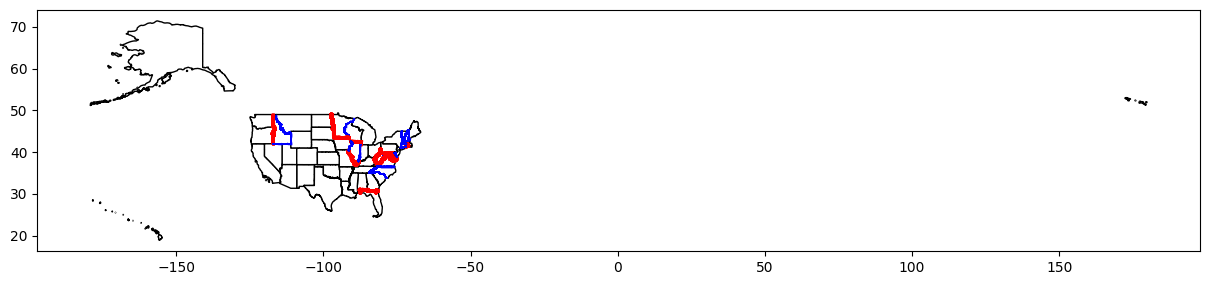

In [112]:
import matplotlib.pyplot as plt

# Plot the states
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
gdf.plot(ax=ax, color='white', edgecolor='black')
try:
    # Plot the boundaries
    for index, boundary in boundary_diffs2.iterrows():
        state1 = gdf[gdf['Province_State'] == boundary['State1']]
        state2 = gdf[gdf['Province_State'] == boundary['State2']]
        line = state1.geometry.iloc[0].intersection(state2.geometry.iloc[0])
        if boundary['significant_20']:
            line_color = 'red'
            line_width = 2
        elif boundary['significant_50']:
            line_color = 'blue'
            line_width = 1
        for l in line.geoms:
            x, y = l.coords.xy
            ax.plot(x, y, color=line_color, linewidth=line_width)
except:
    pass

plt.show()

In [ ]:
#performing t-test between BLVs from traditional and heirarchical approach 

In [115]:
data1=boundary_diffs['boundary_diff']
data2=boundary_diffs2['boundary_diff']

In [116]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(data1, data2)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.0223618431192229
p-value: 0.9821726707500273
